# Concept Linear Regresssion
* Load packages
* Loada data
* prepare Data for the model
* Visualize the data
* chose a model = train
* predict


based on: https://github.com/JHC90/HandsOnMachineLearningSciKitTensorFlow/blob/master/01_the_machine_learning_landscape.ipynb

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
from platform import python_version


# Versionen 

In [38]:
print(python_version())

3.7.4


In [39]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__,
list(imports())

[('builtins',),
 ('builtins',),
 ('matplotlib',),
 ('matplotlib.pyplot',),
 ('numpy',),
 ('pandas',),
 ('sklearn',),
 ('sklearn.linear_model',),
 ('pip',),
 ('types',),
 ('os',),
 ('sys',)]

In [14]:
# Load the data
oecd_bli = pd.read_csv("../datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("../datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")


This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [15]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


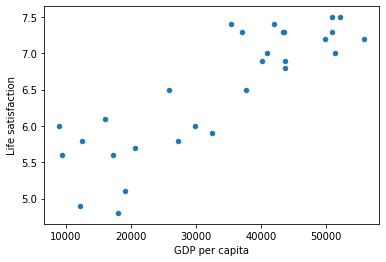

In [16]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


In [17]:
from sklearn import linear_model
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()
# Train the model
lin_reg_model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


In [20]:
# Show Modell Parameter
t0, t1 = lin_reg_model.intercept_[0], lin_reg_model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

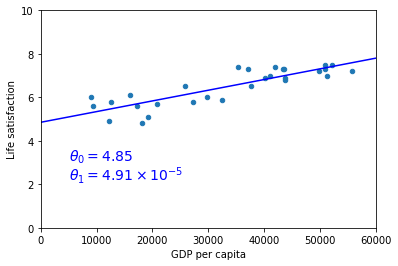

In [27]:
# Visualize the data with the Regression
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()


# Extension
in this part i will use another Algorithm and will use the KNN / has nothing to do with the KNN 

In [7]:
from sklearn.neighbors import KNeighborsClassifier


In [8]:
# Select a linear model
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)


In [9]:
# Train the model
knn_model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [10]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(knn_model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.76666667]]
